In [1]:
import pandas as pd
import copy
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def clean_age(value):
    if value < 18:
        return "Youth"
    elif value >= 18 and value <=35:
        return "Young Adult"
    elif value  >= 36 and value <=55:
        return "Adult"
    else:
        return "Senior"

In [3]:
def map_prediction(value):
    if value == 1:
        return True
    else:
        return False

In [4]:
df_test = pd.read_csv("resources/df_test_with_prediction.csv", index_col=0)
df_test_without_sac = pd.read_csv("resources/df_test_with_prediction_without_sac.csv", index_col=0)
df_test_with_sac = pd.read_csv("resources/df_test_with_prediction_with_sac.csv", index_col=0)

In [5]:
df_test.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,prediction,probability
929115,False,False,Putnam,11/23/2015 03:50:00 PM,Putnam,V,3160,True,O,Seatbelt,62.0,N,W,F,True,1,0.513484
2265098,False,False,East Windsor,03/12/2018 09:39:00 PM,EAST WINDSOR,V,198,True,N,Moving Violation,33.0,H,W,F,True,0,0.487763
845485,False,False,West Haven,03/25/2015 02:04:00 PM,West Haven,E,1175,True,N,Defective Lights,41.0,N,W,M,False,0,0.485408
202820,False,False,Groton Town,02/27/2014 12:00:00 AM,GROTON,V,PSC21911,True,N,Speed Related,32.0,N,B,M,False,0,0.487976
1496502,False,False,Greenwich,11/30/2016 05:55:00 AM,GREENWICH,V,120000089,True,N,Speed Related,56.0,N,W,M,False,0,0.476801


In [6]:
df_test["SubjectAge"] = df_test["SubjectAge"].apply(clean_age)
df_test_without_sac["SubjectAge"] = df_test_without_sac["SubjectAge"].apply(clean_age)
df_test_with_sac["SubjectAge"] = df_test_with_sac["SubjectAge"].apply(clean_age)

In [7]:
df_test["prediction"] = df_test.prediction.apply(map_prediction)
df_test_without_sac["prediction"] = df_test_without_sac.prediction.apply(map_prediction)
df_test_with_sac["prediction"] = df_test_with_sac.prediction.apply(map_prediction)

In [8]:
df_test.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator,prediction,probability
929115,False,False,Putnam,11/23/2015 03:50:00 PM,Putnam,V,3160,True,O,Seatbelt,Senior,N,W,F,True,True,0.513484
2265098,False,False,East Windsor,03/12/2018 09:39:00 PM,EAST WINDSOR,V,198,True,N,Moving Violation,Young Adult,H,W,F,True,False,0.487763
845485,False,False,West Haven,03/25/2015 02:04:00 PM,West Haven,E,1175,True,N,Defective Lights,Adult,N,W,M,False,False,0.485408
202820,False,False,Groton Town,02/27/2014 12:00:00 AM,GROTON,V,PSC21911,True,N,Speed Related,Young Adult,N,B,M,False,False,0.487976
1496502,False,False,Greenwich,11/30/2016 05:55:00 AM,GREENWICH,V,120000089,True,N,Speed Related,Senior,N,W,M,False,False,0.476801


In [9]:
def percentage_of_false_positives_pred(group, threshold=0):
    false_positives = group[(group.prediction == True) & (group.ContrabandIndicator == False)].shape[0]
    n_vehicle_searched = group[(group.prediction == True)].shape[0]
    if n_vehicle_searched > threshold:
        return 100*false_positives/n_vehicle_searched
    else:
        return None

In [10]:
def percentage_of_true_positives_pred(group, threshold=0):
    true_positives = group[(group.prediction == True) & (group.ContrabandIndicator == True)].shape[0]
    n_vehicle_searched = group[(group.prediction == True)].shape[0]
    if n_vehicle_searched > threshold:
        return 100*true_positives/n_vehicle_searched
    else:
        return None

In [11]:
def percentage_of_false_positives_vsi(group, threshold=0):
    false_positives = group[(group.VehicleSearchedIndicator == True) & (group.ContrabandIndicator == False)].shape[0]
    n_vehicle_searched = group[(group.VehicleSearchedIndicator == True)].shape[0]
    if n_vehicle_searched > threshold:
        return 100*false_positives/n_vehicle_searched
    else:
        return None

In [12]:
def percentage_of_true_positives_vsi(group, threshold=0):
    true_positives = group[(group.VehicleSearchedIndicator == True) & (group.ContrabandIndicator == True)].shape[0]
    n_vehicle_searched = group[(group.VehicleSearchedIndicator == True)].shape[0]
    if n_vehicle_searched > threshold:
        return 100*true_positives/n_vehicle_searched
    else:
        return None

In [13]:
def evaluate_bias(row):
    row_ = copy.copy(row)
    n_nulls = len(row[pd.isna(row)])
    len_row = len(row)
    n_not_nulls = len_row - n_nulls
    row_ = row_.dropna()
    if n_not_nulls > 1:
        return max(row_) - min(row_)
    else:
        None  

In [14]:
def diffs(row):
    row_ = copy.copy(row)
    n_nulls = len(row[pd.isna(row)])
    len_row = len(row)
    n_not_nulls = len_row - n_nulls
    row_ = row_.dropna()
    array = row_.values
    if n_not_nulls > 1:
        diff = []
        for i in range(0, len(array)-1):
            for j in range(i+1, len(array)):
                diff.append(abs(array[i]-array[j]))
        return diff
    else:
        return None  

In [15]:
def evaluate_bias_by_group(df, group, threshold=100, prediction=False):
    if prediction == False:
        police_src = df.groupby(by=group).apply(lambda x: percentage_of_true_positives_vsi(x, threshold))
    else:
        police_src = df.groupby(by=group).apply(lambda x: percentage_of_true_positives_pred(x, threshold))
    result = police_src.unstack(level=[1,2,3,4])
    result["Max Diff"] = result.apply(evaluate_bias, axis=1)
    result = result.sort_values(by="Max Diff", ascending=False)
    result["Diff"] = result.drop(columns="Max Diff").apply(diffs, axis=1)
    result = result[(pd.isna(result["Max Diff"])!=True)]
    return result

In [16]:
array_difs = {}
for treshold in [0, 20, 70]:
    for power in [1, 2]:
        print("treshold: " + str(treshold) + "; power: " + str(power))
        df = pd.read_csv("resources/df_test_with_prediction_with_sac_regularization_" + str(treshold) + "_" + str(power) + ".csv")
        df["SubjectAge"] = df["SubjectAge"].apply(clean_age)
        df["prediction"] = df.prediction.apply(map_prediction)
        bias_analysis_pred = evaluate_bias_by_group(df=df, group=["Department Name", "SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=20, prediction=True)
        bias_analysis_pred_diff_array = [item for sublist in bias_analysis_pred["Diff"].values for item in sublist]
        print(np.mean(bias_analysis_pred_diff_array), np.std(bias_analysis_pred_diff_array), np.median(bias_analysis_pred_diff_array), len(np.array(bias_analysis_pred_diff_array)[np.array(bias_analysis_pred_diff_array)<=5]))
        array_difs[str(treshold) + "_" + str(power)] = bias_analysis_pred_diff_array

treshold: 0; power: 1


/home/ines/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


2.796828356321882 2.9273315881519495 2.0 5025
treshold: 0; power: 2
2.756566307859721 2.9370450669388215 1.938017226819794 5203
treshold: 20; power: 1
7.282136995173886 7.2581403150575285 5.092592592592595 228
treshold: 20; power: 2
7.253264265763864 7.218656836293477 5.0 232
treshold: 70; power: 1
6.799150706034234 7.0063106574022065 4.710516639088065 269
treshold: 70; power: 2
7.003789197533934 7.295938512484921 4.723029715762275 253


In [17]:
array_difs = {}
for treshold in [0, 20, 70]:
    for power in [1, 2]:
        print("treshold: " + str(treshold) + "; power: " + str(power))
        df = pd.read_csv("resources/df_test_with_prediction_with_sac_regularization_precision_" + str(treshold) + "_" + str(power) + ".csv")
        df["SubjectAge"] = df["SubjectAge"].apply(clean_age)
        df["prediction"] = df.prediction.apply(map_prediction)
        bias_analysis_pred = evaluate_bias_by_group(df=df, group=["Department Name", "SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=20, prediction=True)
        bias_analysis_pred_diff_array = [item for sublist in bias_analysis_pred["Diff"].values for item in sublist]
        print(np.mean(bias_analysis_pred_diff_array), np.std(bias_analysis_pred_diff_array), np.median(bias_analysis_pred_diff_array), len(np.array(bias_analysis_pred_diff_array)[np.array(bias_analysis_pred_diff_array)<=5]))
        array_difs[str(treshold) + "_" + str(power)] = bias_analysis_pred_diff_array

treshold: 0; power: 1
7.412511101138348 7.23681573482304 5.363984674329501 223
treshold: 0; power: 2
7.419143042164777 7.266527757362948 5.396990140114166 221
treshold: 20; power: 1
7.993072592970619 6.698002698200873 6.437346437346437 227
treshold: 20; power: 2
8.106092431435817 6.925924080272416 6.513720001166419 247
treshold: 70; power: 1
5.8489399473763966 5.7186336202742405 4.3478260869565215 972
treshold: 70; power: 2
6.100748248560805 5.765616857625777 4.486401279879541 824


## Real Values Diff Calculation

In [18]:
bias_analysis_real = evaluate_bias_by_group(df=df_test, group=["Department Name", "SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=20)

In [19]:
bias_analysis_real_diff_array = [item for sublist in bias_analysis_real["Diff"].values for item in sublist]

In [20]:
np.mean(bias_analysis_real_diff_array), np.std(bias_analysis_real_diff_array), np.median(bias_analysis_real_diff_array), len(np.array(bias_analysis_real_diff_array)[np.array(bias_analysis_real_diff_array)<=5])

(10.435923784426116, 7.626521794338053, 8.695652173913043, 80)

## Predicted Values Diff Calculation

In [21]:
bias_analysis_pred = evaluate_bias_by_group(df=df_test, group=["Department Name", "SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=20,  prediction=True)

In [22]:
bias_analysis_pred_diff_array = [item for sublist in bias_analysis_pred["Diff"].values for item in sublist]

In [23]:
np.mean(bias_analysis_pred_diff_array), np.std(bias_analysis_pred_diff_array), np.median(bias_analysis_pred_diff_array), len(np.array(bias_analysis_pred_diff_array)[np.array(bias_analysis_pred_diff_array)<=5])

(6.565918388543074, 7.18549136632755, 4.136119257087, 289)

## Predicted Without SearchAutorizationCode Values - Diff Calculation

In [24]:
#bias_analysis_pred_wht_sac = evaluate_bias_by_group(df=df_test_without_sac, group=["SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=0, prediction=True)
bias_analysis_pred_whtout_sac = evaluate_bias_by_group(df=df_test_without_sac, group=["Department Name", "SubjectRaceCode", "SubjectEthnicityCode", "SubjectAge","SubjectSexCode"], threshold=20, prediction=True)

In [25]:
diffs_pred_whtout_sac =  [item for sublist in bias_analysis_pred_whtout_sac["Diff"].values for item in sublist]

In [26]:
np.mean(diffs_pred_whtout_sac), np.std(diffs_pred_whtout_sac), len(np.array(diffs_pred_whtout_sac)[ np.array(diffs_pred_whtout_sac)<=5])

(2.6503548622934447, 2.8603017372760355, 5457)

## Final Hist

Text(0, 0.5, 'Count')

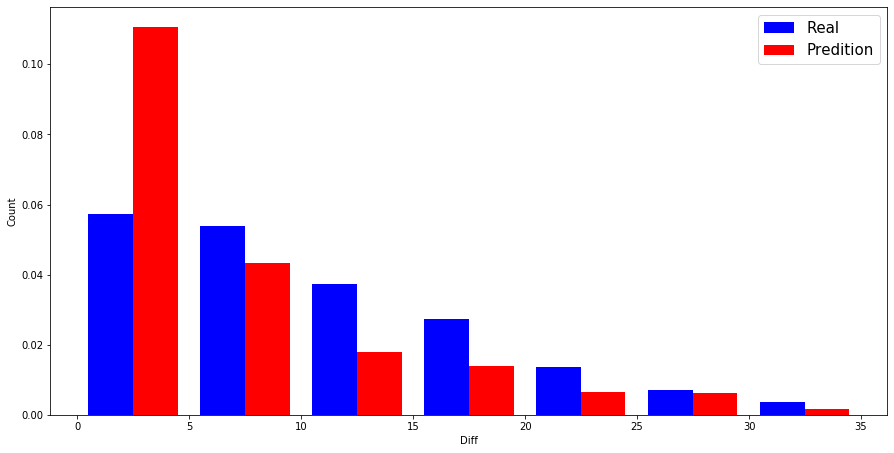

In [27]:
colors = ['blue', 'red']
plt.figure(figsize=(15,7.5))
plt.hist([bias_analysis_real_diff_array, bias_analysis_pred_diff_array], 7, density=True, histtype='bar', color=colors, label=["Real", "Predition"])
plt.legend(prop={'size': 15})
plt.xlabel("Diff")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

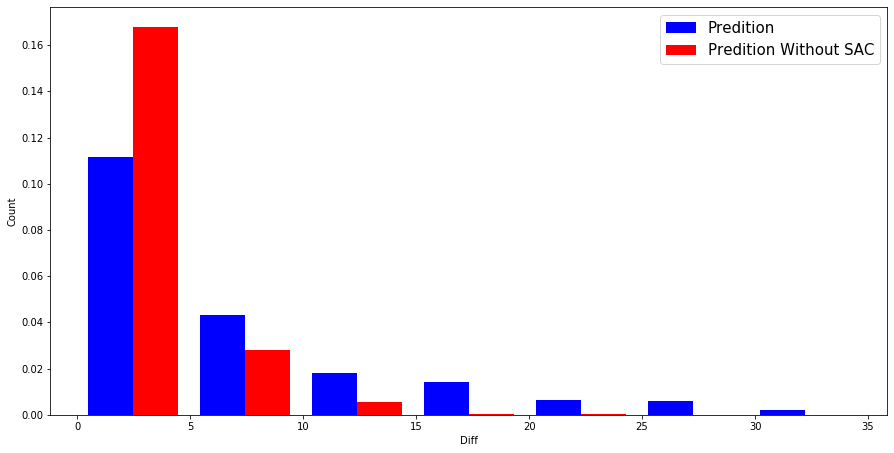

In [28]:
colors = ['blue', 'red']
plt.figure(figsize=(15,7.5))
plt.hist([bias_analysis_pred_diff_array, diffs_pred_whtout_sac], 7, density=True, histtype='bar', color=colors, label=["Predition", "Predition Without SAC" ])
plt.legend(prop={'size': 15})
plt.xlabel("Diff")
plt.ylabel("Count")

## Roc Curve

source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [29]:
def encoding_target(value):
    if value == True:
        return 1
    else:
        return 0

In [30]:
def percentage(value):
    return (1-value, value)

In [31]:
y = df_test.ContrabandIndicator.apply(encoding_target).values
y

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
lr_probs = df_test.probability.values
lr_probs

array([0.51348416, 0.48776293, 0.48540796, ..., 0.48707815, 0.48776293,
       0.47503917])

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y))]

In [34]:
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

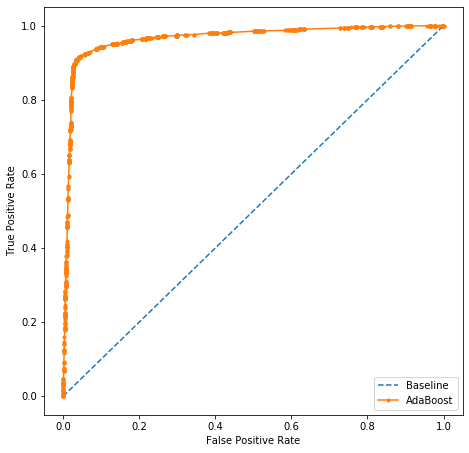

In [35]:
plt.figure(figsize=(7.5,7.5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='AdaBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [36]:
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
ns_auc, lr_auc

(0.5, 0.9664553601938929)